In [6]:
import gym
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
!pip install gym[atari]

In [3]:
h = 200
i = 80 * 80 # input dimensionality: 80x80 grid
o = 6

batch_size = 10 # every how many episodes to do a param update?
learning_rate = 1e-4
gamma = 0.99 # discount factor for reward
decay_rate = 0.99 # decay factor for RMSProp leaky sum of grad^2
resume = False # resume from previous checkpoint?
render = False

In [84]:
env = gym.make("Pong-v0")
observation = env.reset()

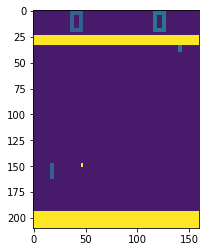

In [112]:
observation, _, _ ,_= env.step(env.action_space.sample())
plt.imshow(observation[:,:,2])

In [10]:
class PolicyNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PolicyNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probabilities = self.forward(state).cpu()
        m = Categorical(probabilities)
        action = m.sample() 
        return action.item(), m.log_prob(action) 

(210, 160, 3)

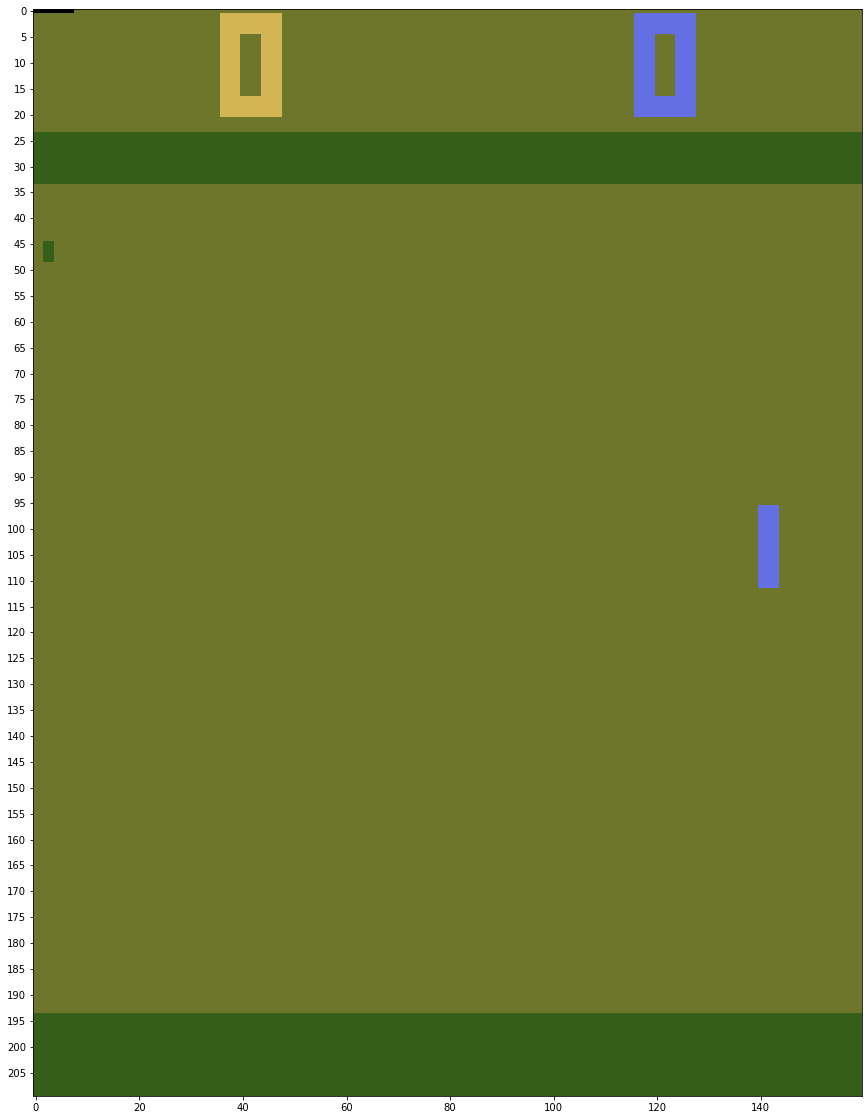

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(observation)
plt.yticks(ticks=range(0,210,5));

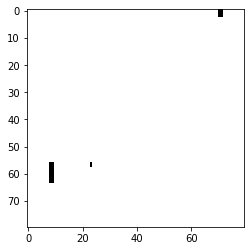

In [126]:
def preprocess_state(state):
    img = state[35:195,:,:]
    img = img[::2, ::2, 0]
    img[img==144] = 0
    img[img==109] = 0
    img[img!=0] = 1
    return img.astype(np.float).ravel()

In [121]:
prep2[prep2 != 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint8)